In [86]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
style.use('fivethirtyeight')

**Describe the problem you want to solve using data science techniques. Why is it important? How your ML model can help (e.g., reduce costs, increase quality, etc.)?**

Our task is to predict the probability of returning a plane ticket. This will help air service companies understand the actual expected number of passengers per flight, understand what size aircraft will be required, whether it is worth changing the plane, reducing or increasing the number of seats, and whether such a flight is convenient at all. In addition, some airlines are selling more tickets than planned for the flight. A good model will reduce risks, increase company profits and satisfy the largest number of passengers.

**1. Loading the data**

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
df = pd.read_csv('/content/drive/My Drive/onetwotrip_challenge_train (1).csv')

In [89]:
pd.options.display.max_columns = None
df

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,1,0,0,9,5,20,-0.661308,1,4,1,4,1,1,1,1,15,1,1,2,1,0,4,1,1,0,1,1,0,1,0,0,0,0
1,1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,1,0,0,21,125,3,-0.101043,1,57,1,5,1,6,2,121,15,1,41,3,1,0,2,1,1,0,1,0,0,0,0,0,0,0
2,2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,1,0,1,7,4,3,-0.661308,1,4,1,2,3,6,2,17,14,1,1,11,7,0,1,1,1,0,1,1,0,0,0,0,0,0
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,1,0,0,19,12,3,-0.521242,2,22,1,3,3,4,1,46,12,2,18,1,1,0,4,1,1,0,1,1,0,0,0,0,0,0
4,4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079,8,11,1,1,0,1,1,0,1,16,4,3,-0.801375,1,100,1,6,1,1,1,17,22,1,1,1,1,0,3,1,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196051,196051,e33b0b1abb0038261ea9fb5213b9aad000a7686edab9e4...,30,-0.083509,7,7,2,0,0,2,1,0,1,0,91,511,0.459223,1,4,33,7,2,3,1,1,17,1,1,3,1,0,3,1,1,0,1,0,0,0,0,0,0,0
196052,196052,ed64c2d35a57e9e8e8e5bc84f3addf5552e1691a52a75d...,104,-0.548937,11,11,2,0,0,1,1,0,0,8,5,16,-0.521242,1,0,1,5,2,5,1,1,23,1,1,12,3,0,4,1,1,0,0,0,0,0,0,0,0,0
196053,196053,b74f63aae0b4a21b972a8a322f36e7935dbd44fe47762e...,12,0.692205,9,9,3,0,0,2,1,0,1,12,2,12,-0.101043,3,7,3,5,2,5,1,1,2,3,1,12,3,0,3,1,1,1,1,1,0,0,0,0,0,0
196054,196054,ddd567f873d77e2118458a4d4bf51643c95df4bbad7dba...,0,-0.704079,11,1,1,1,0,1,1,0,0,23,12,3,-0.801375,2,53,1,6,2,3,1,51,23,2,1,1,1,0,4,1,1,0,1,1,0,0,0,0,0,0


**2. Check data for NaNs and categorical variable. Check target variable.**

In [90]:
df.isna().sum().max()

0

In [91]:
df.dtypes

orderid               int64
userid               object
field0                int64
field1              float64
field2                int64
field3                int64
field4                int64
field5                int64
field6                int64
field7                int64
field8                int64
field9                int64
field10               int64
field11               int64
field12               int64
field13               int64
field14             float64
field15               int64
field16               int64
field17               int64
field18               int64
field19               int64
field20               int64
field21               int64
field22               int64
field23               int64
field24               int64
field25               int64
field26               int64
field27               int64
field28               int64
field29               int64
indicator_goal21      int64
indicator_goal22      int64
indicator_goal23      int64
indicator_goal24    

There are no NaNs in our data. All data except for the 'userid' have numerical type. Column 'userid' should not be converted from object to int, because we will use it only for feature engineering and matching results. There is no need to preprocess target variable - it already 1 column and binary format.

As from the beginning, we don't have information about columns, so, to generate new features and explain why we are choosing them: we need some time to show what we can see from the data and understand to make conclusions about what else can be helpful.

**3. Exploratory analysis of the data**

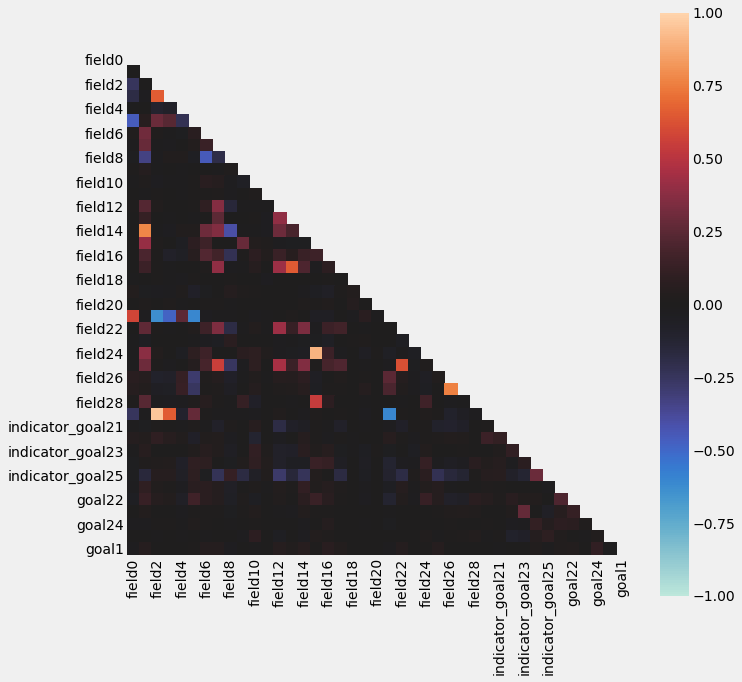

In [92]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[df.columns[2:]].corr(), vmin=-1, vmax=1, center= 0, square=True, mask = np.triu(df[df.columns[2:]].corr()));

We can see high correlation between field1 and field 14, field2 and field29, field15 and field24.

In [93]:
df.describe()

,orderid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
count,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000
mean,98027.500000,28.413163,0.000912,7.980363,7.867864,3.528966,0.556214,1.577911,1.265292,0.879366,0.023937,0.448117,14.633431,12.010492,27.046028,0.001822,1.517153,15.723854,3.001301,3.811941,2.076172,3.993762,1.226471,38.751938,13.028186,1.404645,4.923456,3.875780,1.746557,0.088572,2.980837,0.994966,0.979649,0.348676,0.645754,0.647687,0.036627,0.168579,0.038713,0.022519,0.015098,0.022142
std,56596.636526,69.603944,1.009651,2.757008,3.013659,12.692057,0.496831,5.614900,0.441489,0.325702,0.164366,0.497302,5.519693,19.579464,55.490962,1.007327,0.952774,25.689926,8.510708,1.931365,0.980940,1.975246,0.418548,71.517212,6.132370,0.784647,11.652149,4.230396,1.376456,0.369773,0.919229,0.070774,0.141199,0.476552,0.478285,0.477692,0.187845,0.374381,0.192912,0.148365,0.121942,0.147144
min,0.000000,0.000000,-0.859222,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.941441,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49013.750000,0.000000,-0.471365,6.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,11.000000,4.000000,3.000000,-0.521242,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,98027.500000,0.000000,-0.238651,8.000000,8.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,5.000000,4.000000,-0.241109,1.000000,6.000000,1.000000,4.000000,2.000000,4.000000,1.000000,17.000000,13.000000,1.000000,1.000000,2.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,147041.250000,13.000000,0.149205,10.000000,10.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,19.000000,11.000000,26.000000,0.179090,2.000000,18.000000,1.000000,5.000000,3.000000,6.000000,1.000000,42.000000,18.000000,2.000000,1.000000,5.000000,3.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,196055.000000,500.000000,82.142134,12.000000,12.000000,363.000000,1.000000,323.000000,2.000000,1.000000,4.000000,1.000000,23.000000,273.000000,746.000000,55.225183,18.000000,340.000000,156.000000,7.000000,8.000000,7.000000,2.000000,867.000000,23.000000,18.000000,170.000000,28.000000,7.000000,8.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Binary Columns: field5(0,1), field7(1,2), field8(0,1), field10(0,1), field21(1,2), indicator_goal21-indicator_goal25, goal21-goal25

Max value = 12: **field2, field3 ~ month**

Max value = 7: **field18, field20, field27 ~ days of the week**

Max value = 23: **field11 ~ hours**

Max values 500, 363 and 323: **field0, field4, field6 ~ probably they have a connection with days during the year**

Let's check days of the week:

In [94]:
day_week = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
day = []
for i in range(7):
    day.append(day_week[df.field18.unique()[i] - 1])

day_week = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
day_1 = []
for i in range(7):
    day_1.append(day_week[df.field20.unique()[i] - 1])

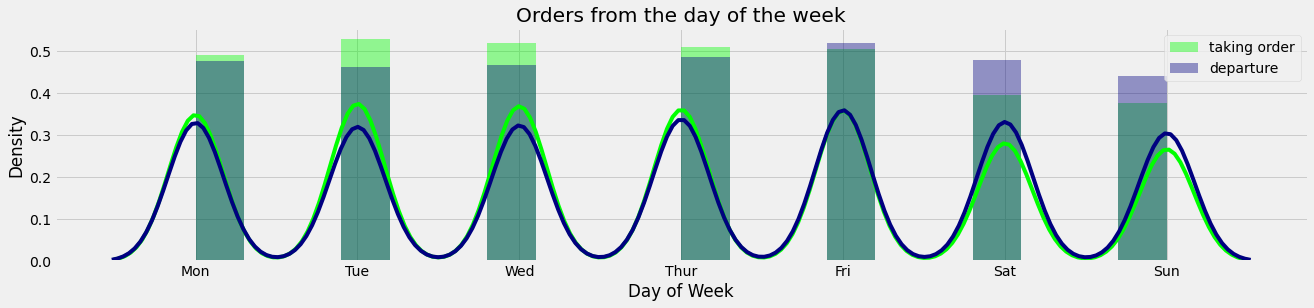

In [95]:
plt.figure(figsize=(20, 4))
plt.title('Orders from the day of the week')
sns.distplot(df.field18,  kde=True, label='taking order', bins = 20, color='lime')
plt.xlabel('Day of Week')
plt.xticks(df.field18.unique(), day);

sns.distplot(df.field20,  kde=True, label='departure',bins=20, color='navy')
plt.xlabel('Day of Week')
plt.xticks(df.field20.unique(), day_1)
plt.legend();

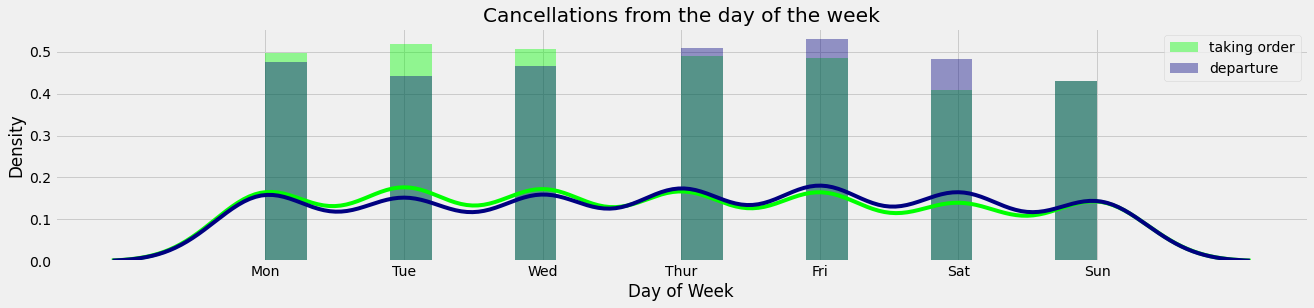

In [96]:
plt.figure(figsize=(20, 4))
plt.title('Сancellations from the day of the week')
sns.distplot(df.field18[df['goal1'] == 1],  kde=True, label='taking order', bins = 20, color='lime')
plt.xlabel('Day of Week')
plt.xticks(df.field18.unique(), day);

sns.distplot(df.field20[df['goal1'] == 1],  kde=True, label='departure',bins=20, color='navy')
plt.xlabel('Day of Week')
plt.xticks(df.field20.unique(), day_1)
plt.legend();

In [97]:
def relative(column, data):
    a = column.value_counts()
    data['a'] = column.map(a)
    b = column[data['goal1'] == 1].value_counts()
    data['b'] = column.map(b)
    data['b'] = data['b'].replace(np.NaN, 0)
    perc = data['b']/data['a']
    data = data.drop(['a','b'], axis=1, inplace=True)
    return perc

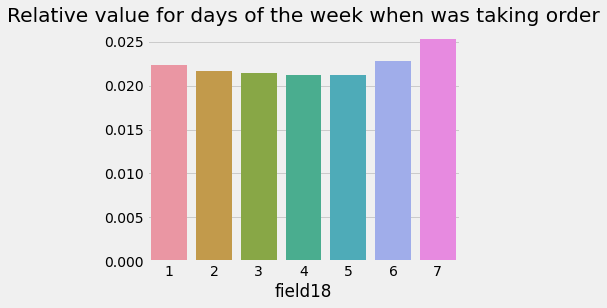

In [98]:
perc_day_week = relative(df.field18, df)
fig, ax = plt.subplots(figsize=(5, 4))
plt.title('Relative value for days of the week when was taking order')
sns.barplot(df.field18, perc_day_week, ax=ax);

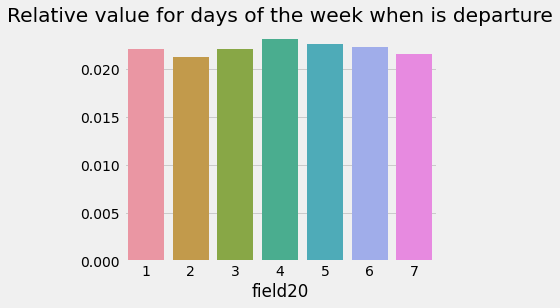

In [99]:
perc_day_week2 = relative(df.field20, df)
fig, ax = plt.subplots(figsize=(5, 4))
plt.title('Relative value for days of the week when is departure')
sns.barplot(df.field20, perc_day_week2, ax=ax);

We can see not high changes between days which can mean that this feature might not be realy helpful for us.

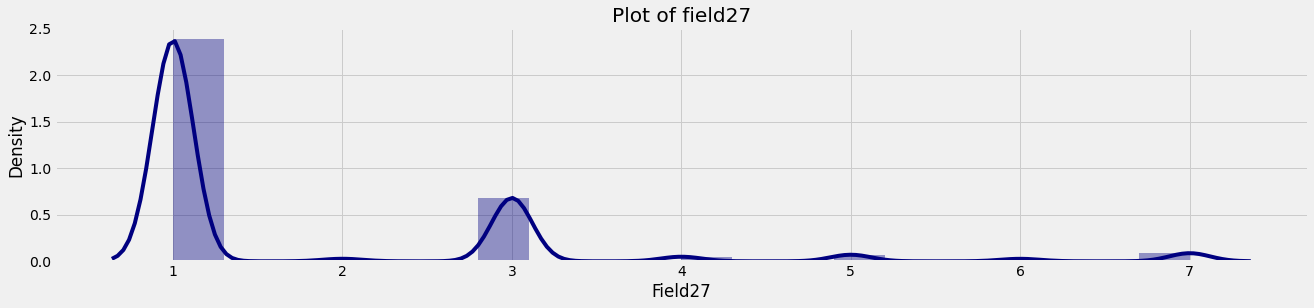

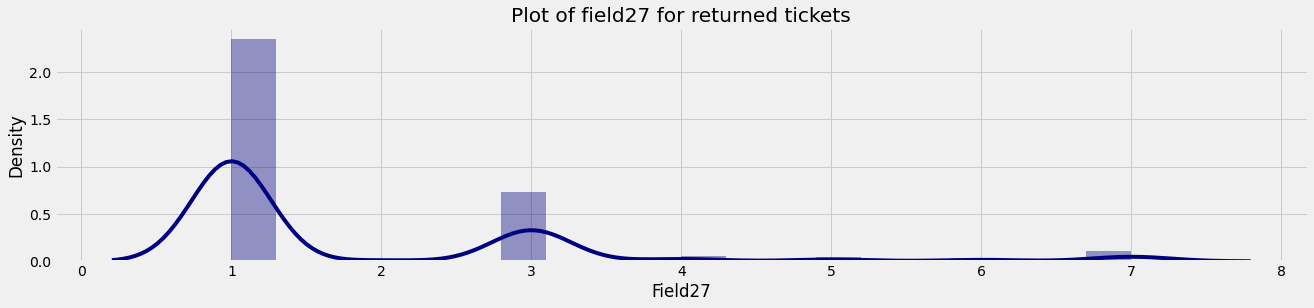

In [100]:
plt.figure(figsize=(20, 4))
plt.title('Plot of field27')
sns.distplot(df.field27,  kde=True, bins = 20, color='navy')
plt.xlabel('Field27');

plt.figure(figsize=(20, 4))
plt.title('Plot of field27 for returned tickets')
sns.distplot(df.field27[df.goal1 == 1],  kde=True, bins = 20, color='navy')
plt.xlabel('Field27');

Field27 - seems differently, maybe it is not days of the week, but anyway feature shows the dependence and let's leave it with us.

Let's check month:

In [101]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
srt_mnt = []
for i in range(12):
    srt_mnt.append(month[df.field3.unique()[i] - 1])

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
srt_mnt_1 = []
for i in range(12):
    srt_mnt_1.append(month[df.field2.unique()[i] - 1])

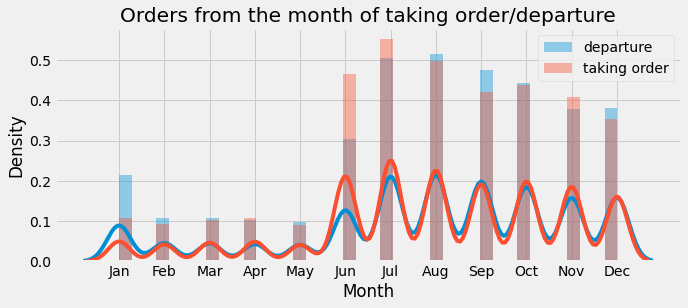

In [102]:
plt.figure(figsize=(10, 4))
sns.distplot(df.field3,  kde=True, label = 'departure', bins=40)
plt.title('Orders from the month of taking order/departure')
plt.xlabel('Month')
plt.xticks(df.field3.unique(), srt_mnt)

sns.distplot(df.field2,  kde=True, label = 'taking order', bins=40)
plt.xlabel('Month')
plt.xticks(df.field2.unique(), srt_mnt_1);
plt.legend();

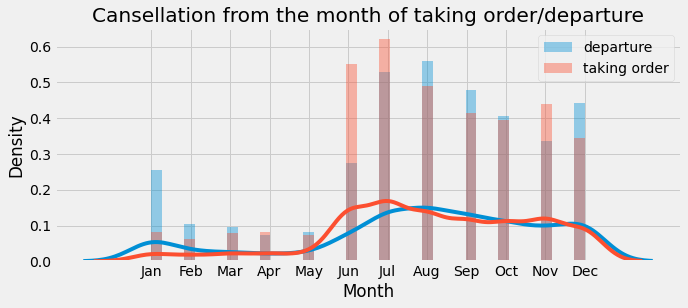

In [103]:
plt.figure(figsize=(10, 4))
sns.distplot(df.field3[df['goal1'] == 1],  kde=True, label = 'departure', bins=40)
plt.title('Cansellation from the month of taking order/departure')
plt.xlabel('Month')
plt.xticks(df.field3.unique(), srt_mnt)

sns.distplot(df.field2[df['goal1'] == 1],  kde=True, label = 'taking order', bins=40)
plt.xlabel('Month')
plt.xticks(df.field2.unique(), srt_mnt_1);
plt.legend();

In [104]:
perc_month = relative(df.field3, df)
perc_month2 = relative(df.field2, df)

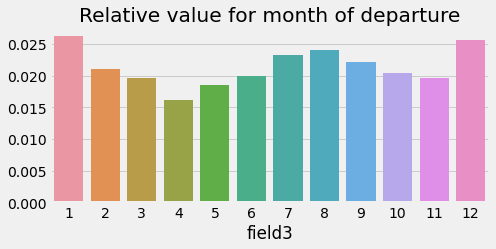

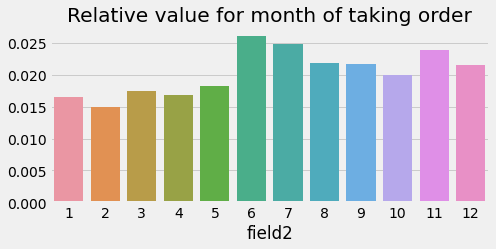

In [105]:
fig, ax = plt.subplots(figsize=(7, 3))
plt.title('Relative value for month of departure')
sns.barplot(df.field3, perc_month, ax=ax);

fig, ax = plt.subplots(figsize=(7, 3))
plt.title('Relative value for month of taking order')
sns.barplot(df.field2, perc_month2, ax=ax);

We can see here that for December and January there was high amount of cansellation while there were not hihg amount of orders. 

This feature seems to be important for us.

In [106]:
df.field21.value_counts()  #this is a year of taking order

1    151655
2     44401
Name: field21, dtype: int64

So next, in part with feature generation, we can add a year to the month (We will separate months of the first and the second years).

As there was high correlation between field2 and field29, let's check field29:

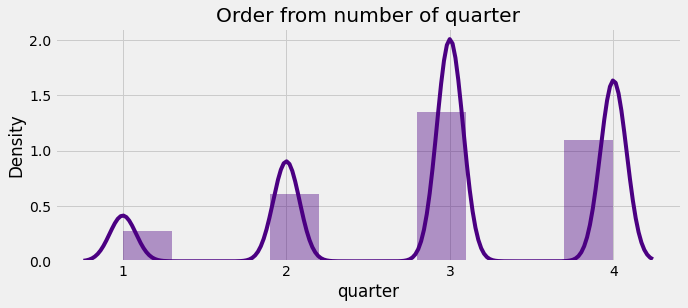

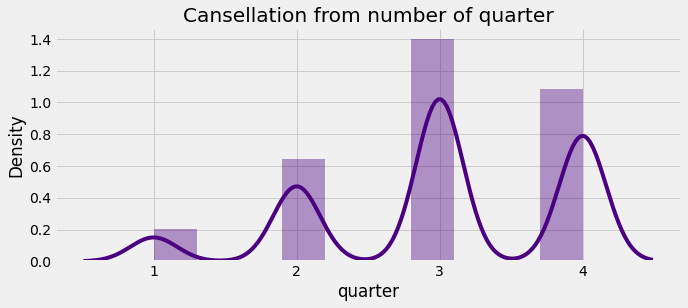

In [107]:
plt.figure(figsize=(10, 4))
sns.distplot(df.field29,  kde=True, color = 'indigo',bins = 10)
plt.title('Order from number of quarter')
plt.xlabel('quarter')
plt.xticks(df.field29.unique());

plt.figure(figsize=(10, 4))
sns.distplot(df.field29[df['goal1'] == 1],  kde=True, color = 'indigo',bins = 10)
plt.title('Cansellation from number of quarter')
plt.xlabel('quarter')
plt.xticks(df.field29.unique());

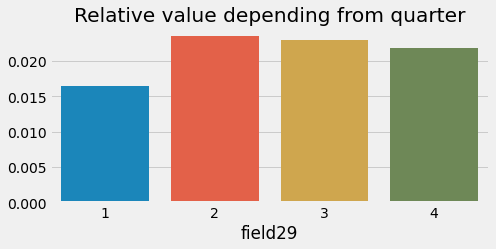

In [108]:
perc_quarter = relative(df.field29, df)
fig, ax = plt.subplots(figsize=(7, 3))
plt.title('Relative value depending from quarter')
sns.barplot(df.field29, perc_quarter, ax=ax);

Well, here is an example when based on feature distribution it seems like influenced feature, but in percentage, you can see not high different between all four seasons.

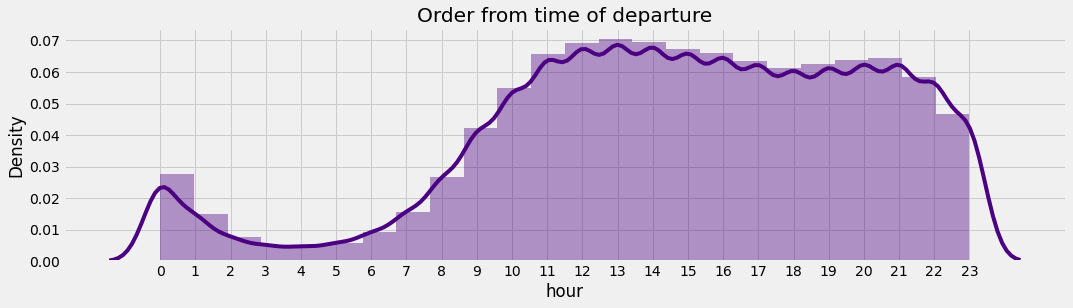

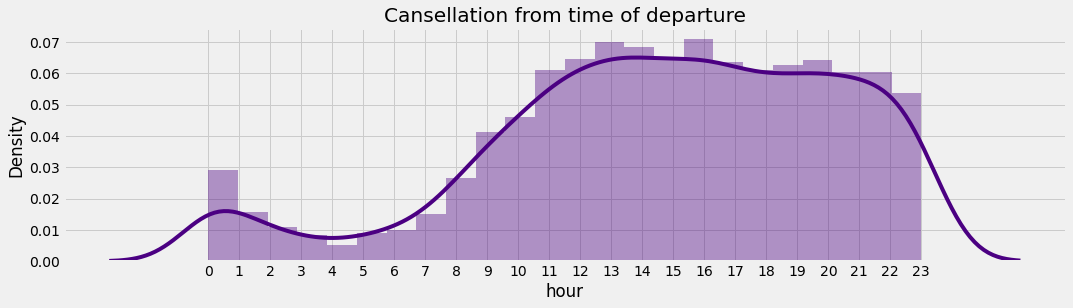

In [109]:
plt.figure(figsize=(16, 4))
plt.title('Order from time of departure')
sns.distplot(df.field11,  kde=True, bins=24, color= 'indigo')
plt.xlabel('hour')
plt.xticks(df.field11.unique());

plt.figure(figsize=(16, 4))
plt.title('Cansellation from time of departure')
sns.distplot(df.field11[df['goal1'] == 1],  kde=True, bins=24, color= 'indigo')
plt.xlabel('hour')
plt.xticks(df.field11.unique());

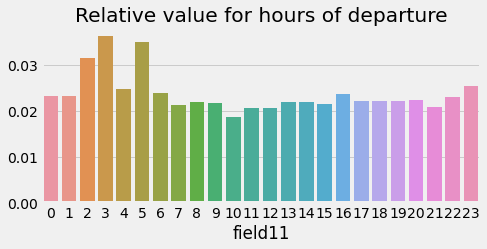

In [110]:
perc_hour = relative(df.field11, df)
fig, ax = plt.subplots(figsize=(7, 3))
plt.title('Relative value for hours of departure')
sns.barplot(df.field11, perc_hour, ax=ax);

We can see an interesting thing here, despite the fact that most tickets are bought for night-time, per cent of returned ticket bigger during night and morning. Maybe this is a clear visualization of how much people want to sleep and that this is important. So before you will take a flight at night - think twice.

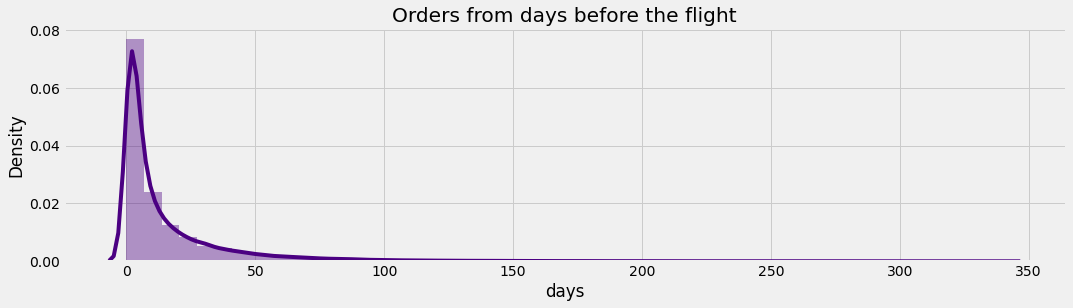

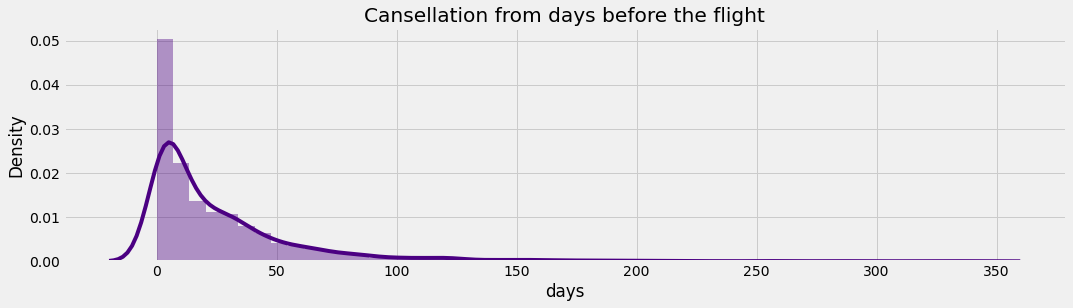

In [111]:
plt.figure(figsize=(16, 4))
plt.title('Orders from days before the flight')
sns.distplot(df.field16,  kde=True, color= 'indigo')
plt.xlabel('days');

plt.figure(figsize=(16, 4))
plt.title('Cansellation from days before the flight')
sns.distplot(df.field16[df['goal1'] == 1],  kde=True, color= 'indigo')
plt.xlabel('days');

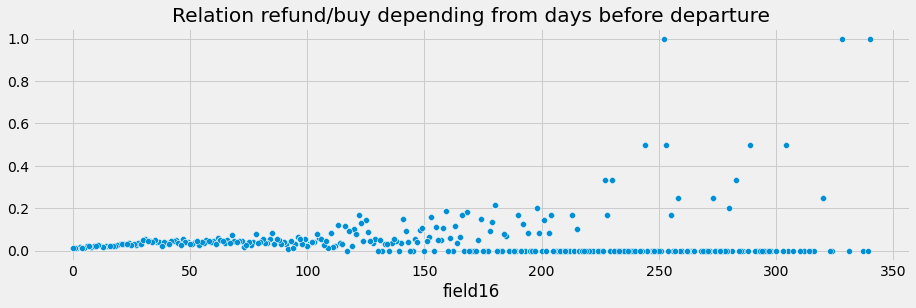

In [112]:
perc_day_before_fly = relative(df.field16, df)
fig, ax = plt.subplots(figsize=(14, 4))
plt.title('Relation refund/buy depending from days before departure')
sns.scatterplot(df['field16'], perc_day_before_fly, ax=ax);

From the distribution, it was already clear that this feature is important, but when we divide the number of people who refund the ticket by all people who bought, became visible another dependency - when there are more than 180 days before flight people are more often refund their tickets. We will use this information in feature generation.

Let's move to features with the number of people.

In [149]:
df['field9'].unique() #tickts for children under 1 y.o.

array([0, 1, 2, 4, 3])

In [148]:
df['field28'].unique()    #tickets for children from 2 to 6 y.o.

array([0, 1, 2, 3, 4, 8, 6, 5, 7])

In [120]:
 sum(df['field15'] - df['field24'] - df['field28'] - df['field9'])

0

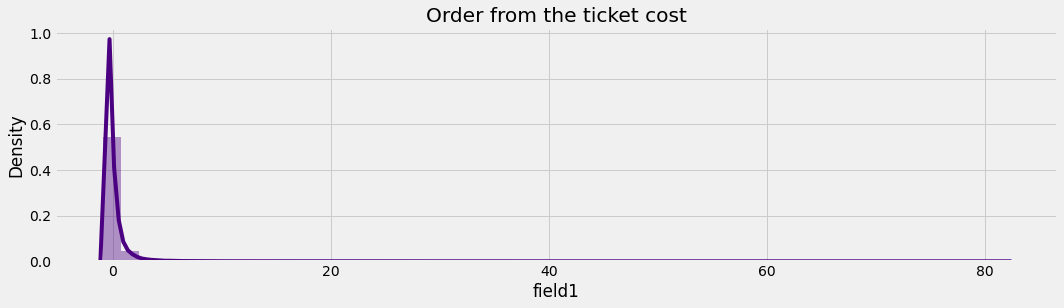

In [150]:
plt.figure(figsize=(16, 4))
plt.title('Order from the ticket cost')
sns.distplot(df.field1,  kde=True, color = 'indigo')

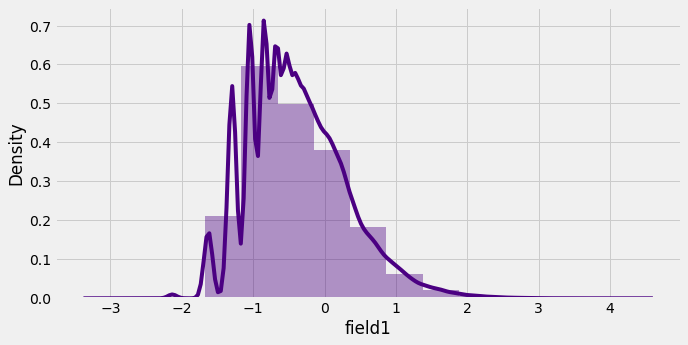

In [123]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(np.log(df['field1'] + 0.9), bins=15, color = 'indigo');

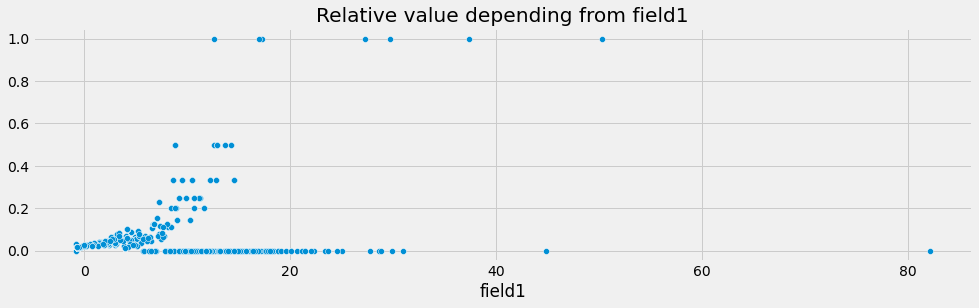

In [122]:
perc_field1 = relative(df.field1, df)
fig, ax = plt.subplots(figsize=(15, 4))
plt.title('Relative value depending from field1')
sns.scatterplot(df.field1, perc_field1, ax=ax);

**4.Models**

Let's split the data frame into X (inputs) and y (outputs).

In [124]:
X = df.drop(['goal1', 'orderid', 'userid'], axis = 1)
y = df.goal1

Let's scale the data except the dummy variables.

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [126]:
scale_cols = set(X.columns) - set(['indicator_goal21', 'indicator_goal22', 'indicator_goal23', 'indicator_goal24', 'indicator_goal25',\
                     'field5', 'field7', 'field8', 'field10', 'field21', 'goal21', 'goal22', 'goal23', 'goal24', 'goal25'])
X[list(scale_cols)]=scaler.fit_transform(X[list(scale_cols)])

Now we will build 4 models and choose the best one. Also, we will choose the best metric for the model via cross-validation.

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4.1. Logistic Regression**

In [128]:
%timeit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(penalty='l2')
scor_clf_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy', verbose=50)
scor_clf_roc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  ................................................................
[CV] .................................... , score=0.978, total=   2.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[CV]  ................................................................
[CV] .................................... , score=0.978, total=   2.5s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.2s remaining:    0.0s
[CV]  ................................................................
[CV] .................................... , score=0.978, total=   2.5s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.7s remaining:    0.0s
[CV]  ................................................................
[CV] .................................... , score=0.978, total=   2.6s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.3s remaining:    0.0s
[CV]  .........................

In [129]:
print('roc_auc_score is:', scor_clf_roc.mean())
print('accuracy is:', scor_clf_acc.mean())

roc_auc_score is: 0.6995561260661154
accuracy is: 0.9778175623528377


Let's watch on the target variable distribution.

In [130]:
(y[y == 0].shape[0])/(y.shape[0])*100

97.78583669971844

Accuracy is not informative for this problem, since we have imbalanced classes. We have almost 98% of zeros in our dataset.
So, we will choose roc-auc metric, because this metric is not sensitive for class distribution (it does not matter how imbalance our classes are).

Now we will find the best hyperparameters for LogisticRegression model.



In [131]:
import time

In [132]:
%%time
from sklearn.model_selection import GridSearchCV
C_s = np.logspace(-2, 4, 7)
clf_grid = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=clf_grid, param_grid=dict(C=C_s),scoring='roc_auc')
grid.fit(X, y)
print('best score is:', grid.best_score_)
print('best C is:',grid.best_estimator_.C)

best score is: 0.6996770634007302
best C is: 0.1
CPU times: user 2min 7s, sys: 53 s, total: 3min
Wall time: 1min 31s


In [133]:
clf_best = LogisticRegression(penalty='l2', C = grid.best_estimator_.C)
scor_clf_best_roc = cross_val_score(clf_best, X, y, cv=5, scoring='roc_auc')
print('best_roc_auc_score is:', scor_clf_best_roc.mean())

best_roc_auc_score is: 0.6996770634007302


**2.KNn**

In [54]:
%timeit
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)
scor_neigh_roc = cross_val_score(neigh, X, y, cv=2, scoring='roc_auc', verbose=100, n_jobs=-1)
print('roc_auc_score is:', scor_neigh_roc.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


KeyboardInterrupt: ignored

Now we will find the best hyperparameters for KNeighborsClassifier model.

In [ ]:
N = np.array([8,9,10,11,12])
model_knn = KNeighborsClassifier()
grid_knn = GridSearchCV(estimator=model_knn, param_grid=dict(n_neighbors=N), scoring='roc_auc')
grid_knn.fit(X, y)
print('best score is:', grid_knn.best_score_)
print('best n_neighbors is:', grid_knn.best_estimator_.n_neighbors)

In [ ]:
neigh_best_cross = KNeighborsClassifier(n_neighbors = grid_knn.best_estimator_.n_neighbors)
scor_neigh_best_cross_roc = cross_val_score(neigh_best_cross, X, y, cv=5, scoring='roc_auc')
print('roc_auc_score is:', scor_neigh_best_cross_roc.mean())

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh_best_cross = KNeighborsClassifier(n_neighbors = 3)
neigh_best_cross.fit(X_train, y_train)
y_pred_neigh = neigh_best_cross.predict_proba(X_test)[:,1]
print('roc_auc_score is:', roc_auc_score(y_test, neigh_best_cross.predict_proba(X_test)[:,1]))

**3. Random Forest**

In [134]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth = 5, random_state = 42, n_estimators = 10)
scor_forest_roc = cross_val_score(forest, X, y, cv=5, scoring='roc_auc')
print('roc_auc_score is:', scor_forest_roc.mean())

roc_auc_score is: 0.6906474397030988


Now we will find the best hyperparameters for RandomForestClassifier model.

In [135]:
%%time
param_grid = {'max_depth': range(4, 10), 'n_estimators': range(8, 15)}
grid_forest = GridSearchCV(estimator=forest, param_grid=param_grid, scoring = 'roc_auc')
grid_forest.fit(X, y)
print('best score is:', grid_forest.best_score_)
print('best depth and estimators is:',grid_forest.best_estimator_.max_depth, grid_forest.best_estimator_.n_estimators)

best score is: 0.701396994316957
best depth and estimators is: 9 13
CPU times: user 4min 22s, sys: 810 ms, total: 4min 23s
Wall time: 4min 22s


In [136]:
forest_b = RandomForestClassifier(max_depth = grid_forest.best_estimator_.max_depth, random_state = 42, n_estimators = grid_forest.best_estimator_.n_estimators)
scor_forest_b_roc = cross_val_score(forest_b, X, y, cv=5, scoring='roc_auc')
print('roc_auc_score is:', scor_forest_b_roc.mean())

roc_auc_score is: 0.701396994316957


**4.Catboost**

In [137]:
!pip install catboost
from catboost import CatBoostClassifier
from IPython.display import clear_output
clear_output()

In [138]:
cat = CatBoostClassifier(learning_rate=0.02, depth = 8, random_state=42, iterations=1000, verbose=200, task_type='GPU')
scor_cat_roc = cross_val_score(cat, X, y, cv=5, scoring='roc_auc')
print('roc_auc_score is:', scor_cat_roc.mean())

0:	learn: 0.6569762	total: 21.9ms	remaining: 21.8s
200:	learn: 0.0961067	total: 2.88s	remaining: 11.5s
400:	learn: 0.0929711	total: 5.57s	remaining: 8.33s
600:	learn: 0.0903772	total: 8.27s	remaining: 5.49s
800:	learn: 0.0881263	total: 11s	remaining: 2.72s
999:	learn: 0.0859758	total: 13.7s	remaining: 0us
0:	learn: 0.6565160	total: 14.6ms	remaining: 14.6s
200:	learn: 0.0967945	total: 2.71s	remaining: 10.8s
400:	learn: 0.0937386	total: 5.39s	remaining: 8.06s
600:	learn: 0.0909886	total: 8.12s	remaining: 5.39s
800:	learn: 0.0885681	total: 10.8s	remaining: 2.68s
999:	learn: 0.0863468	total: 13.4s	remaining: 0us
0:	learn: 0.6564279	total: 14.6ms	remaining: 14.6s
200:	learn: 0.0967501	total: 2.67s	remaining: 10.6s
400:	learn: 0.0936765	total: 5.39s	remaining: 8.04s
600:	learn: 0.0911205	total: 8.01s	remaining: 5.32s
800:	learn: 0.0888833	total: 10.6s	remaining: 2.64s
999:	learn: 0.0867634	total: 13.3s	remaining: 0us
0:	learn: 0.6563436	total: 14.5ms	remaining: 14.5s
200:	learn: 0.0961738	to

Now we will find the best hyperparameters for CatBoostClassifier model.

In [140]:
param_grid = {
    'learning_rate' : [1e-2, 2e-2, 3e-2],
    'depth' : [6, 7, 8]
}
grid_search_result = cat.grid_search(param_grid, 
                                       X=X, 
                                       y=y, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

bestTest = 0.1007336161
bestIteration = 999
0:	loss: 0.1007336	best: 0.1007336 (0)	total: 49.1s	remaining: 6m 33s
bestTest = 0.1005076434
bestIteration = 884
1:	loss: 0.1005076	best: 0.1005076 (1)	total: 1m 38s	remaining: 5m 44s
bestTest = 0.1004811759
bestIteration = 988
2:	loss: 0.1004812	best: 0.1004812 (2)	total: 2m 28s	remaining: 4m 56s
bestTest = 0.1006393394
bestIteration = 997
3:	loss: 0.1006393	best: 0.1004812 (2)	total: 3m 38s	remaining: 4m 33s
bestTest = 0.1004700435
bestIteration = 998
4:	loss: 0.1004700	best: 0.1004700 (4)	total: 4m 51s	remaining: 3m 53s
bestTest = 0.100328118
bestIteration = 821
5:	loss: 0.1003281	best: 0.1003281 (5)	total: 6m 5s	remaining: 3m 2s
bestTest = 0.1005896608
bestIteration = 999
6:	loss: 0.1005897	best: 0.1003281 (5)	total: 7m 53s	remaining: 2m 15s
bestTest = 0.1003561171
bestIteration = 997
7:	loss: 0.1003561	best: 0.1003281 (5)	total: 9m 49s	remaining: 1m 13s
bestTest = 0.1003743598
bestIteration = 873
8:	loss: 0.1003744	best: 0.1003281 (5)	t

In [141]:
grid_search_result

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [144]:
cat_best = CatBoostClassifier(learning_rate= 0.03, depth = 7, random_state=42, iterations=1000)
scor_cat_best_roc = cross_val_score(cat_best, X, y, cv=5, scoring='roc_auc')
print('roc_auc_score is:', scor_cat_best_roc.mean())

Выходные данные были обрезаны до нескольких последних строк (5000).
2:	learn: 0.5468678	total: 206ms	remaining: 1m 8s
3:	learn: 0.5072466	total: 248ms	remaining: 1m 1s
4:	learn: 0.4711356	total: 316ms	remaining: 1m 2s
5:	learn: 0.4381947	total: 379ms	remaining: 1m 2s
6:	learn: 0.4084596	total: 442ms	remaining: 1m 2s
7:	learn: 0.3813448	total: 498ms	remaining: 1m 1s
8:	learn: 0.3569531	total: 563ms	remaining: 1m 1s
9:	learn: 0.3348254	total: 622ms	remaining: 1m 1s
10:	learn: 0.3146664	total: 681ms	remaining: 1m 1s
11:	learn: 0.2964206	total: 740ms	remaining: 1m
12:	learn: 0.2799485	total: 806ms	remaining: 1m 1s
13:	learn: 0.2645151	total: 869ms	remaining: 1m 1s
14:	learn: 0.2510226	total: 927ms	remaining: 1m
15:	learn: 0.2380375	total: 986ms	remaining: 1m
16:	learn: 0.2268597	total: 1.05s	remaining: 1m
17:	learn: 0.2161775	total: 1.11s	remaining: 1m
18:	learn: 0.2066739	total: 1.17s	remaining: 1m
19:	learn: 0.1978001	total: 1.23s	remaining: 1m
20:	learn: 0.1898585	total: 1.3s	remaining:

So we have next roc-auc metrics:

Logistic Regression: 0.6996

kNN: 0.6678

Random Forest: 0.7014

Catboost:0.7153

We can see that catboost have best performance, so we will use it.

**New features**

**Feature1: number of tickets for each person: how many tickets he/she bought**

In [145]:
tickets_per_person = df['userid'].value_counts()
df['tickets_per_person'] = df['userid'].map(tickets_per_person)
df['tickets_per_person'].value_counts()

1     78149
2     41418
3     21171
4     12764
5      7970
      ...  
61       61
58       58
57       57
54       54
49       49
Name: tickets_per_person, Length: 71, dtype: int64

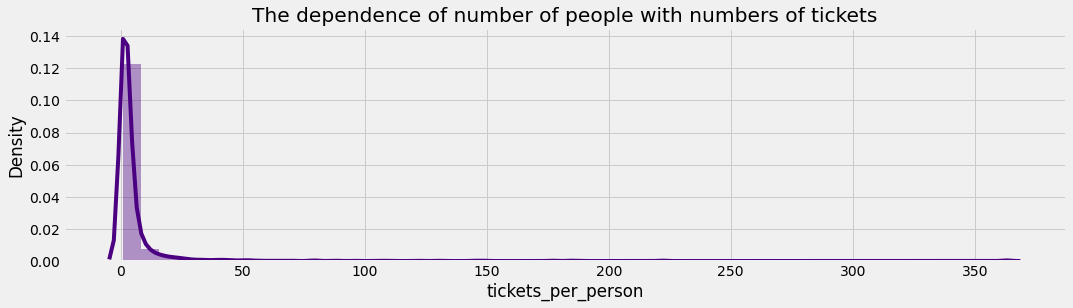

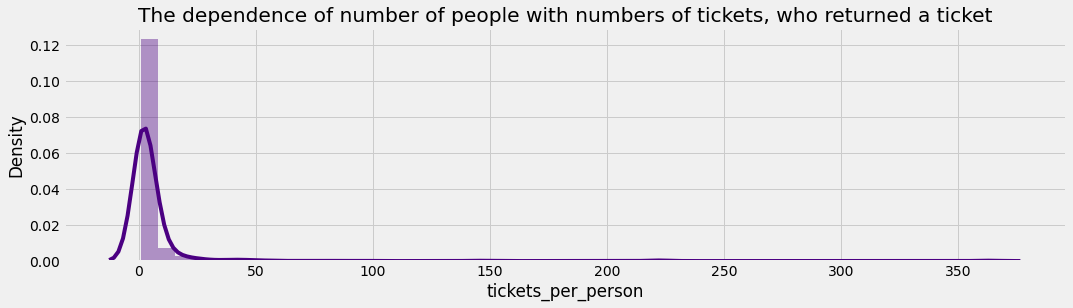

In [151]:
plt.figure(figsize=(16, 4))
plt.title('The dependence of number of people with numbers of tickets')
sns.distplot(df['tickets_per_person'],  kde=True, color= 'indigo')
# plt.xlabel('percent');

plt.figure(figsize=(16, 4))
plt.title('The dependence of number of people with numbers of tickets, who returned a ticket')
sns.distplot(df['tickets_per_person'][df.goal1 == 1],  kde=True, color= 'indigo')
# plt.xlabel('percent');

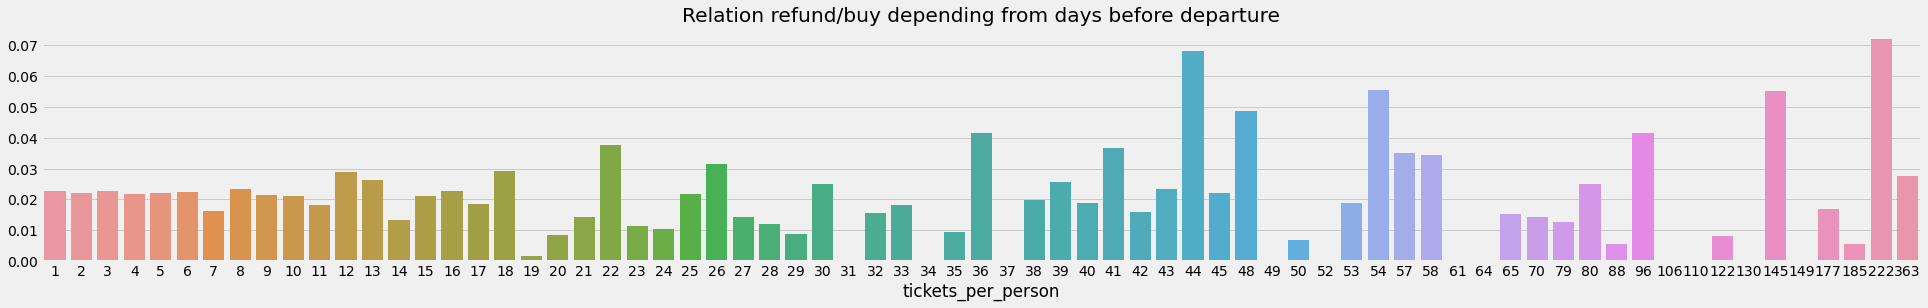

In [152]:
perc_tick_pers = relative(df['tickets_per_person'], df)
fig, ax = plt.subplots(figsize=(30, 4))
plt.title('Relation refund/buy depending from days before departure')
sns.barplot(df['tickets_per_person'], perc_tick_pers, ax=ax);

**Feature 2: approximate cost for one ticket**

In [153]:
df['ticket_price'] = df['field1'] / df['field15']

**Feature 3**: based on field1 - cost of the order and relative plot which showed that for bigger cost - ticket refund happens more often

In [154]:
df['perc_field1'] = perc_field1

df['new_field1'] = perc_field1
df['new_field1'][df.perc_field1 <= 0.2] = 0
df['new_field1'][df.perc_field1 > 0.2] = 1

**Feature 4**: based on field16 - days before flight and relative plot which showed that for more days before flight people refund tickets more often

In [155]:
df['perc_day_before_fly'] = perc_day_before_fly

df['new_field16'] = perc_day_before_fly
df['new_field16'][df.field16 <= 180] = 0
df['new_field16'][df.field16 > 180] = 1

**Feature 5**: adding a year to the month

In [156]:
df.loc[df['field21']==1,'field2'] = df['field2'] + 12 
df.loc[df['field21']==1,'field3'] = df['field3'] + 12 

New Catboost

In [157]:
X = df.drop(['goal1', 'orderid', 'userid'], axis = 1)
y = df.goal1
scale_cols = set(X.columns) - set(['indicator_goal21', 'indicator_goal22', 'indicator_goal23', 'indicator_goal24', 'indicator_goal25',\
                     'field5', 'field7', 'field8', 'field10', 'field21', 'goal21', 'goal22', 'goal23', 'goal24', 'goal25','new_field1','new_field16'])
X[list(scale_cols)]=scaler.fit_transform(X[list(scale_cols)])

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
X

,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,tickets_per_person,ticket_price,perc_field1,new_field1,perc_day_before_fly,new_field16
0,-0.408213,-0.621424,0.809139,0.980652,-0.199256,1,-0.281023,1,1,-0.145633,0,-1.020609,-0.358054,-0.126976,-0.658308,-0.542789,-0.456361,-0.235152,0.097371,-1.097086,-1.515644,1,-0.527873,0.321543,-0.515704,-0.336716,-0.443407,-0.542378,-0.239531,1.108718,1,1,0,1,1,0,1,0,0,0,-0.232236,-0.894836,-0.733336,0.0,-0.498037,0.0
1,1.660641,-0.390934,-1.729429,-1.453159,-0.120467,0,-0.281023,2,1,-0.145633,0,1.153431,5.770832,-0.433333,-0.102116,-0.542789,1.606710,-0.235152,0.615141,-1.097086,1.015693,2,1.150049,0.321543,-0.515704,3.096136,-0.207021,-0.542378,-0.239531,-1.067024,1,1,0,1,0,0,0,0,0,0,-0.186321,-0.496773,-0.213846,0.0,2.040142,0.0
2,1.516970,-0.544594,-2.152524,-2.025820,-0.120467,0,-0.281023,1,1,-0.145633,1,-1.382948,-0.409128,-0.433333,-0.658308,-0.542789,-0.456361,-0.235152,-0.938169,0.941781,1.015693,2,-0.304150,0.158473,-0.515704,-0.336716,1.684059,3.816655,-0.239531,-2.154895,1,1,0,1,1,0,0,0,0,0,-0.186321,-0.762148,-0.385581,0.0,-0.498037,0.0
3,-0.408213,-0.237274,0.668107,0.837487,-0.199256,1,0.253271,2,1,-0.145633,0,0.791091,-0.000536,-0.433333,-0.519260,0.506781,0.244304,-0.235152,-0.420399,0.941781,0.003158,1,0.101347,-0.167666,0.758758,1.122246,-0.679792,-0.542378,-0.239531,1.108718,1,1,0,1,1,0,0,0,0,0,-0.140405,-0.027289,-0.024394,0.0,0.521349,0.0
4,-0.408213,-0.698255,0.386044,0.837487,-0.199256,1,-0.281023,1,1,-0.145633,1,0.247581,-0.409128,-0.433333,-0.797356,-0.542789,3.280522,-0.235152,1.132911,-1.097086,-1.515644,1,-0.304150,1.463029,-0.515704,-0.336716,-0.679792,-0.542378,-0.239531,0.020847,1,1,0,0,1,0,0,0,0,0,-0.232236,-1.027523,-0.330801,0.0,0.040592,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196051,0.022798,-0.083614,0.245013,0.264826,-0.120467,0,-0.281023,2,1,-0.145633,1,-2.651138,4.034314,8.721334,0.454075,-0.542789,-0.456361,3.524827,1.650681,-0.077652,-0.503109,1,-0.527873,0.647682,-0.515704,-0.336716,-0.207021,-0.542378,-0.239531,0.020847,1,1,0,1,0,0,0,0,0,0,-0.094490,0.033977,-0.061612,0.0,-0.498037,0.0
196052,1.085959,-0.544594,0.809139,0.837487,-0.120467,0,-0.281023,1,1,-0.145633,0,-1.201779,-0.358054,-0.199060,-0.519260,-0.542789,-0.612065,-0.235152,0.615141,-0.077652,0.509426,1,-0.527873,1.626099,-0.515704,-0.336716,1.920445,0.910633,-0.239531,1.108718,1,1,0,0,0,0,0,0,0,0,-0.186321,-0.762148,-0.385581,0.0,-0.567832,0.0
196053,-0.235809,0.684687,0.527076,0.551156,-0.041677,0,-0.281023,2,1,-0.145633,1,-0.477099,-0.511276,-0.271144,-0.102116,1.556351,-0.339584,-0.000153,0.615141,-0.077652,0.509426,1,-0.527873,-1.798361,2.033220,-0.336716,1.920445,0.910633,-0.239531,0.020847,1,1,1,1,1,0,0,0,0,0,-0.140405,0.571497,-0.017503,0.0,-0.144049,0.0
196054,-0.408213,-0.698255,0.809139,-0.594167,-0.199256,1,-0.281023,1,1,-0.145633,0,1.515771,-0.000536,-0.433333,-0.797356,0.506781,1.451006,-0.235152,1.132911,-0.077652,-0.503109,1,0.171261,1.626099,0.758758,-0.336716,-0.679792,-0.542378,-0.239531,1.108718,1,1,0,1,1,0,0,0,0,0,-0.140405,-0.425352,-0.330801,0.0,1.765883,0.0


In [160]:
from sklearn.metrics import roc_auc_score

In [162]:
cat_new = CatBoostClassifier(verbose=200, task_type='GPU')
param_grid = {
    'learning_rate' : [1e-2, 2e-2, 3e-2],
    'depth' : [6, 7, 8]
}
grid_search_result = cat_new.grid_search(param_grid, 
                                       X=X, 
                                       y=y, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

bestTest = 0.09973011291
bestIteration = 999
0:	loss: 0.0997301	best: 0.0997301 (0)	total: 49.9s	remaining: 6m 39s
bestTest = 0.09933857391
bestIteration = 999
1:	loss: 0.0993386	best: 0.0993386 (1)	total: 1m 39s	remaining: 5m 47s
bestTest = 0.09923012646
bestIteration = 906
2:	loss: 0.0992301	best: 0.0992301 (2)	total: 2m 29s	remaining: 4m 58s
bestTest = 0.09964179467
bestIteration = 999
3:	loss: 0.0996418	best: 0.0992301 (2)	total: 3m 41s	remaining: 4m 37s
bestTest = 0.0992604915
bestIteration = 993
4:	loss: 0.0992605	best: 0.0992301 (2)	total: 4m 55s	remaining: 3m 56s
bestTest = 0.0991467518
bestIteration = 999
5:	loss: 0.0991468	best: 0.0991468 (5)	total: 6m 10s	remaining: 3m 5s
bestTest = 0.09951414571
bestIteration = 999
6:	loss: 0.0995141	best: 0.0991468 (5)	total: 8m 3s	remaining: 2m 18s
bestTest = 0.0992324426
bestIteration = 998
7:	loss: 0.0992324	best: 0.0991468 (5)	total: 10m 1s	remaining: 1m 15s
bestTest = 0.09913523338
bestIteration = 998
8:	loss: 0.0991352	best: 0.099135

In [167]:
grid_search_result

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [168]:
cat_new = CatBoostClassifier(learning_rate=0.03, depth = 8, random_state=42, iterations=1000, verbose=200, task_type='GPU')
cat_new.fit(X_train, y_train)
y_pred_cat = cat_new.predict_proba(X_test)[:,1] #our_prediction
roc_auc_score(y_test, y_pred_cat)

0:	learn: 0.6385276	total: 21.7ms	remaining: 21.6s
200:	learn: 0.0929676	total: 2.83s	remaining: 11.2s
400:	learn: 0.0890743	total: 5.53s	remaining: 8.26s
600:	learn: 0.0857474	total: 8.25s	remaining: 5.48s
800:	learn: 0.0824435	total: 11s	remaining: 2.73s
999:	learn: 0.0794493	total: 13.6s	remaining: 0us


0.7229478685105631

In [169]:
from catboost import Pool as P

In [170]:
f_imp = pd.DataFrame(list(zip(X.columns, cat_new.get_feature_importance(P(X, y)))), columns = ['features', 'importance'])

In [171]:
f_imp.sort_values(by=['importance'])

,features,importance
45,new_field16,0.031907
43,new_field1,0.040644
30,indicator_goal21,0.180945
21,field21,0.200165
31,indicator_goal22,0.280901
39,goal25,0.300871
37,goal23,0.305576
5,field5,0.428285
9,field9,0.475333
8,field8,0.655777
